In [11]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualization for report

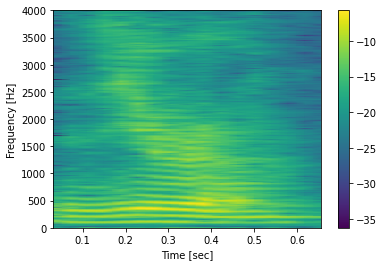

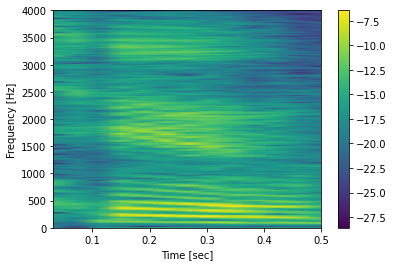

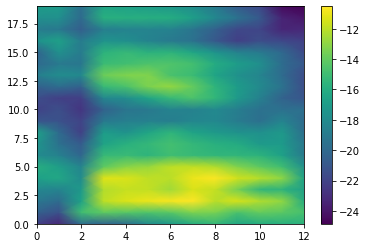

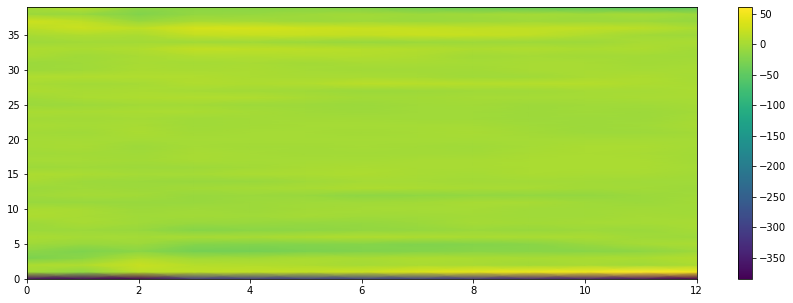

In [285]:
from GmmHmm import GmmHmm
from mfcc import MFCC
from scipy.io import wavfile
import os
import numpy as np
import matplotlib.pyplot as plt

feature_extractor = MFCC(FFT_size=512, mel_filter_num=20, dct_filter_num=40)
sample_rate, audio  = wavfile.read("./recordings/0_jackson_0.wav")
features = feature_extractor.get_dct(audio, sample_rate, int(0.025 * sample_rate))
feature_extractor.visualize_Sxx()

sample_rate, audio  = wavfile.read("./recordings/2_jackson_0.wav")
features = feature_extractor.get_dct(audio, sample_rate, int(0.025 * sample_rate))
feature_extractor.visualize_Sxx()

feature_extractor.visualize_mel()
plt.figure(figsize=(15,5))
plt.pcolormesh(np.arange(features.shape[1]), np.arange(features.shape[0]),
              features, shading='gouraud')
plt.colorbar()
plt.show()

In [305]:
from sklearn import model_selection
from MyGaussianHmm import MyGaussianHmm
audio_foldes = "./recordings/"
files = os.listdir(audio_foldes)
train_x, test_x = model_selection.train_test_split(files, train_size=0.8)
train_x, test_x = sorted(train_x), sorted(test_x)
label = None
models =[]
feature_extractor = MFCC(FFT_size=512, mel_filter_num=40, dct_filter_num=20)
for train_file in train_x:
    if int(train_file[0]) != label:
        if int(train_file[0]) != 0:
            model = MyGaussianHmm(3)
            model.train(X.T, n_iter=200)
            models.append(model)
            
        X = np.array([])
        label = int(train_file[0])
#         print(label)
    filepath = os.path.join(audio_foldes, train_file)
    sample_rate, audio  = wavfile.read(filepath)

    if len(audio) / sample_rate < 0.3 or len(audio.shape) != 1:
        continue
    features = feature_extractor.get_dct(audio, sample_rate, int(0.025 * sample_rate))
    if features.shape[1] < 15:
        continue
    if len(X) == 0:
        X = features[:, :15]
    else:
        X = np.append(X, features[:,:15], axis=0)
print("Trained")

<ipython-input-305-842b2c18e8fc>:21: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio  = wavfile.read(filepath)


Trained


In [306]:

predicted = []

labels = np.array([list])
filtered_test_y = []
for test_file in test_x:
    scores = []
    sample_rate, audio  = wavfile.read(os.path.join(audio_foldes, test_file))
    if len(audio) / sample_rate < 0.3 or len(audio.shape) != 1:
        continue
    features = feature_extractor.get_dct(audio, sample_rate, int(0.025 * sample_rate))

    if features.shape[1] < 15:
        continue
    filtered_test_y.append(int(test_file[0]))
    for model in models:
        scores.append(model.score(features[:,:15].T))
    index=np.array(scores).argmax()
    predicted.append(index)
print("OK")
predicted=np.array(predicted)
filtered_test_y=np.array(filtered_test_y)
(filtered_test_y == predicted).sum() / len(filtered_test_y) 

<ipython-input-306-2cea9dabc989>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio  = wavfile.read(os.path.join(audio_foldes, test_file))


OK


0.32653061224489793